### **Machine Learning Tutorial: CIFAR-10 Image Classification Using Convolutional Neural Networks**


Loading and Preprocessing the CIFAR-10

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Building and Compiling the CNN Model for CIFAR-10

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Data Augmentation Setup

In [3]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(x_train)


Training the CNN Model on the CIFAR-10 Dataset

In [4]:
# Train the model
# The `fit` method trains the CNN model using the training data (x_train and y_train)
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, verbose=1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 107ms/step - accuracy: 0.2924 - loss: 1.9233 - val_accuracy: 0.4879 - val_loss: 1.4240
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 103ms/step - accuracy: 0.4671 - loss: 1.4615 - val_accuracy: 0.5582 - val_loss: 1.2416
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.5340 - loss: 1.2909 - val_accuracy: 0.5676 - val_loss: 1.2330
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.5644 - loss: 1.2137 - val_accuracy: 0.6292 - val_loss: 1.0623
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 105ms/step - accuracy: 0.5977 - loss: 1.1379 - val_accuracy: 0.6366 - val_loss: 1.0361
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.6282 - loss: 1.0638 - val_accuracy: 0.6468 - val_loss: 1.0072
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.6338 - loss: 1.0330 - val_accuracy: 0.6675 - val_loss: 0.9492
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.6494 - loss: 0

Plot Training History

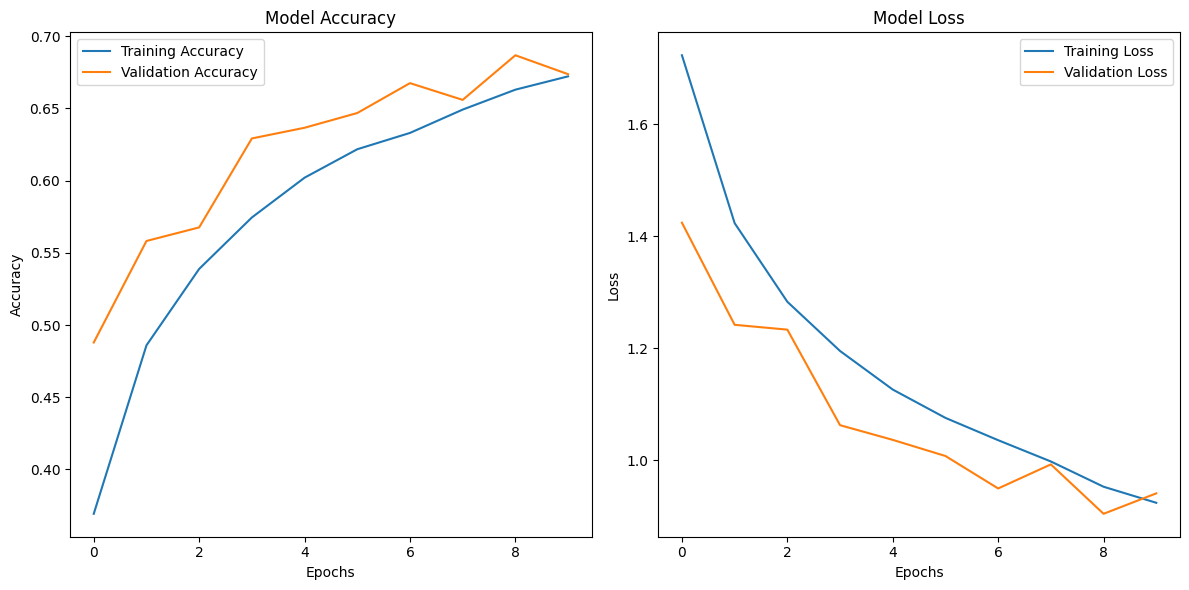

In [5]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluating the Trained Model on the Test Set

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
# Print the test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6827 - loss: 0.9332
Test accuracy: 67.78%


Generate Predictions

In [7]:
# Predict labels for the test set
# Predict the labels for the test data
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions
y_true = np.argmax(y_test, axis=1)  # Get true class labels


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


Confusion Matrix

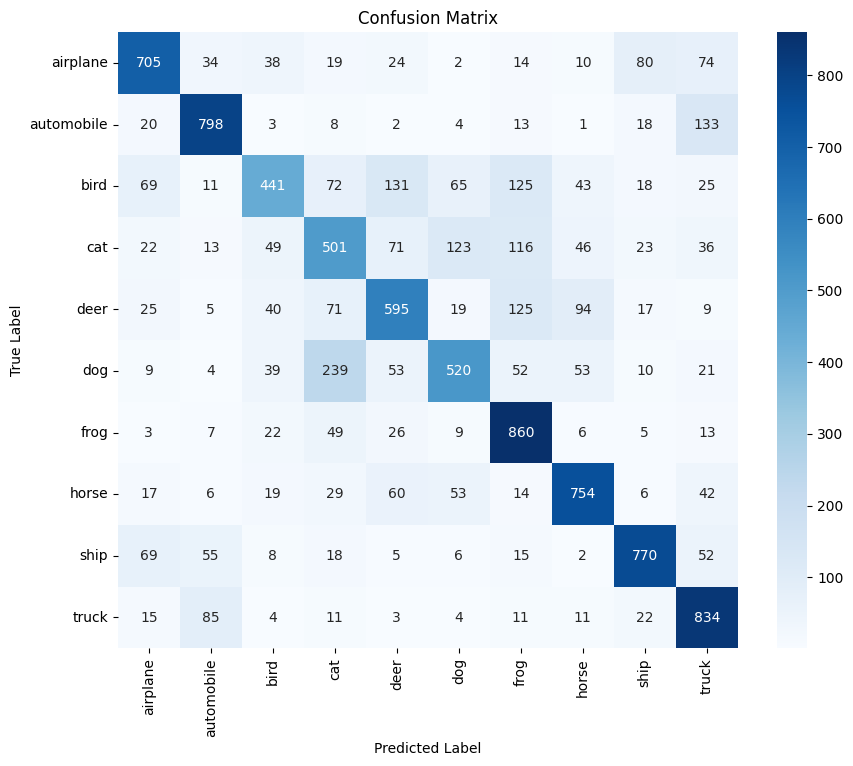

In [8]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Displaying Correctly and Incorrectly Predicted Images

Correctly Predicted Images:


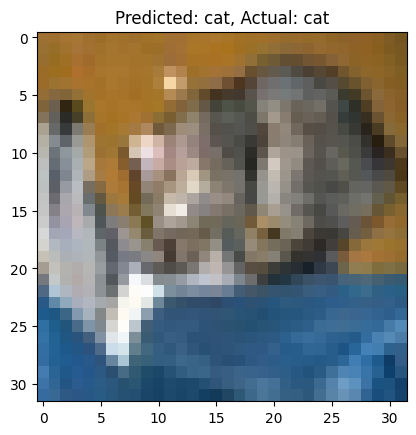

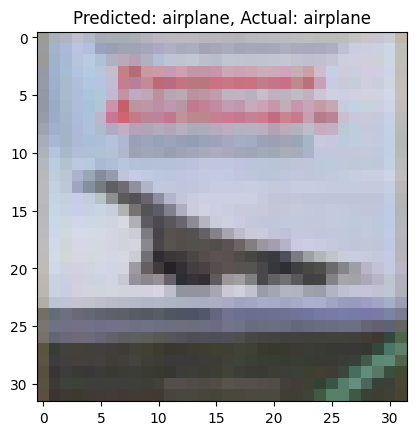

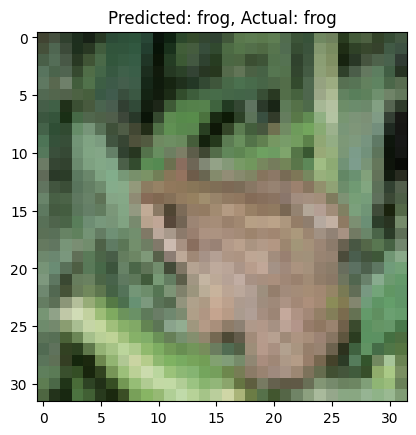

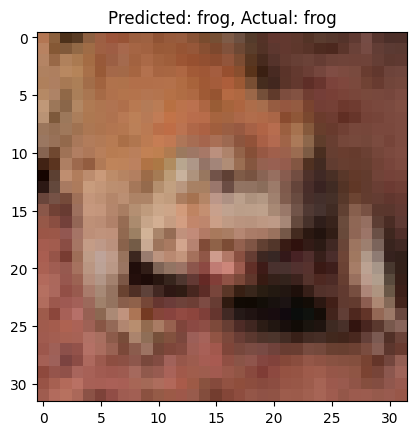

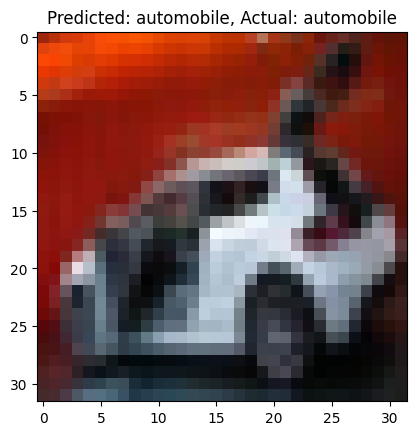

Incorrectly Predicted Images:


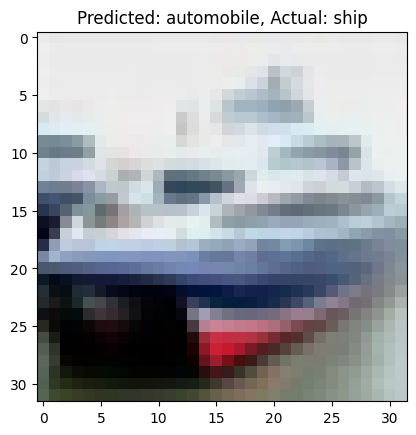

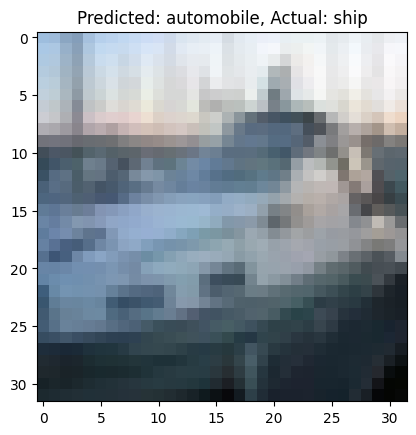

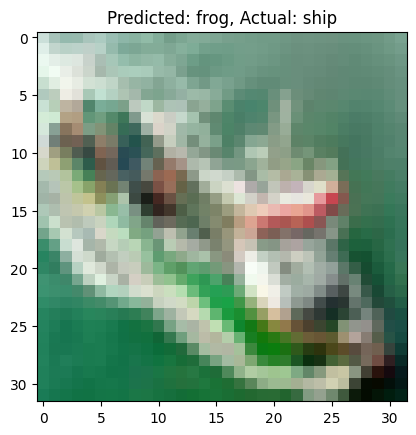

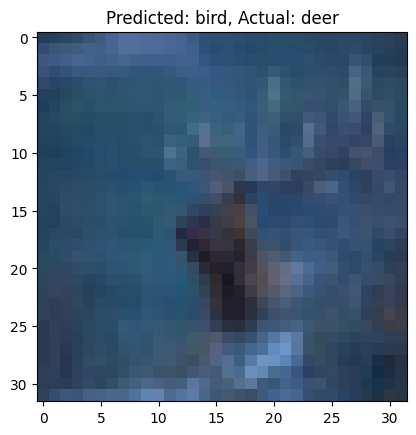

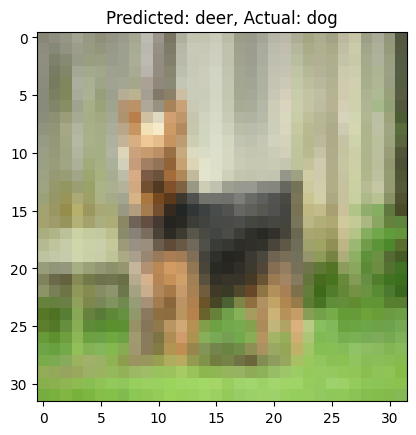

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to hold indices of correct and incorrect predictions
correct_indices = []
incorrect_indices = []

# Loop through the test set to compare predicted and actual labels
for i in range(len(x_test)):
    predicted_class = np.argmax(y_pred[i]) # Changed 'predictions' to 'y_pred'
    actual_class = np.argmax(y_test[i])

# If the prediction matches the actual class, add to correct_indices, otherwise to incorrect_indices
    if predicted_class == actual_class:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

# Display 5 correctly predicted images
print("Correctly Predicted Images:")
for i in range(min(5, len(correct_indices))):
    idx = correct_indices[i]
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {class_names[np.argmax(y_pred[idx])]}, Actual: {class_names[np.argmax(y_test[idx])]}") # Changed 'predictions' to 'y_pred'
    plt.show()

# Display 5 incorrectly predicted images
print("Incorrectly Predicted Images:")
for i in range(min(5, len(incorrect_indices))):
    idx = incorrect_indices[i]
    plt.imshow(x_test[idx])
    plt.title(f"Predicted: {class_names[np.argmax(y_pred[idx])]}, Actual: {class_names[np.argmax(y_test[idx])]}") # Changed 'predictions' to 'y_pred'
    plt.show()
